# Wine Classification Project
This project uses the scikit-learn wine dataset to predict the **class of wine** using chemical features.

We will go through:
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Supervised Learning Models
- Unsupervised Learning (Clustering)
- Conclusion and Findings

A more thorough analysis will be provided in the PDF report


In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

# Load dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Exploratory Data Analysis
Let's explore the structure, summary statistics, and visual relationships in the dataset.

In [2]:
# Summary statistics and class distribution
print(df.describe())
print(df['target'].value_counts())

          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

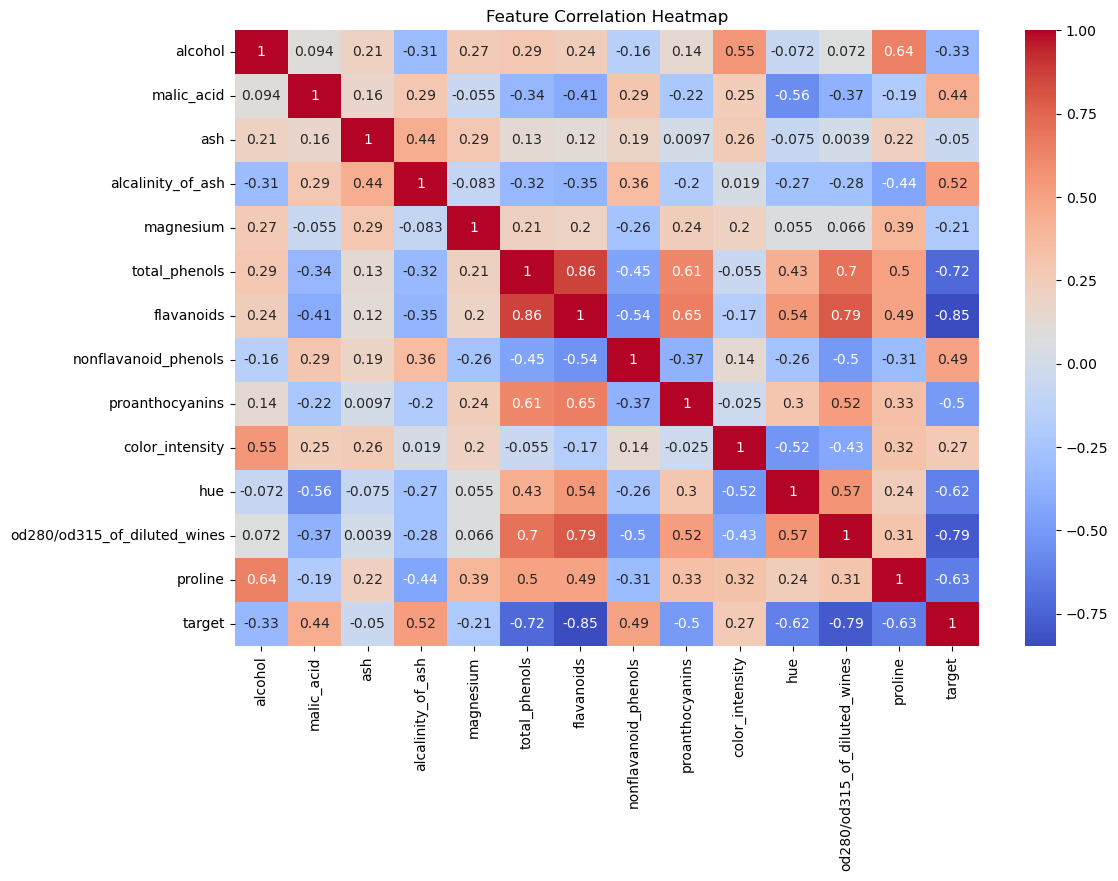

In [3]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## Feature Engineering and PCA
We'll scale features and apply PCA for visualization.

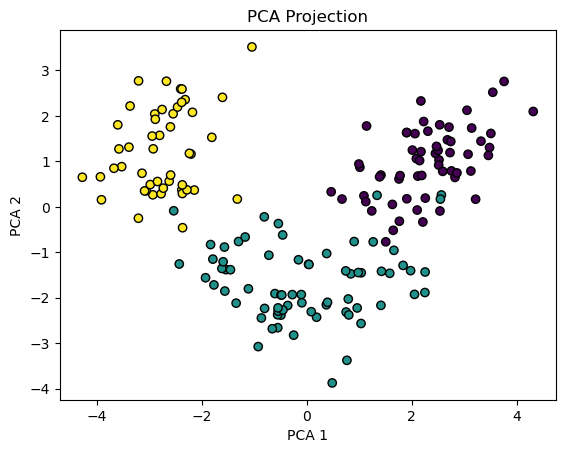

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop('target', axis=1)
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection')
plt.show()

## Supervised Learning Models
We'll use Tree Classifier and  Random Forest and evaluate its performance.

              precision    recall  f1-score   support

     class_0       1.00      0.95      0.97        19
     class_1       0.91      1.00      0.95        21
     class_2       1.00      0.93      0.96        14

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

[[18  1  0]
 [ 0 21  0]
 [ 0  1 13]]


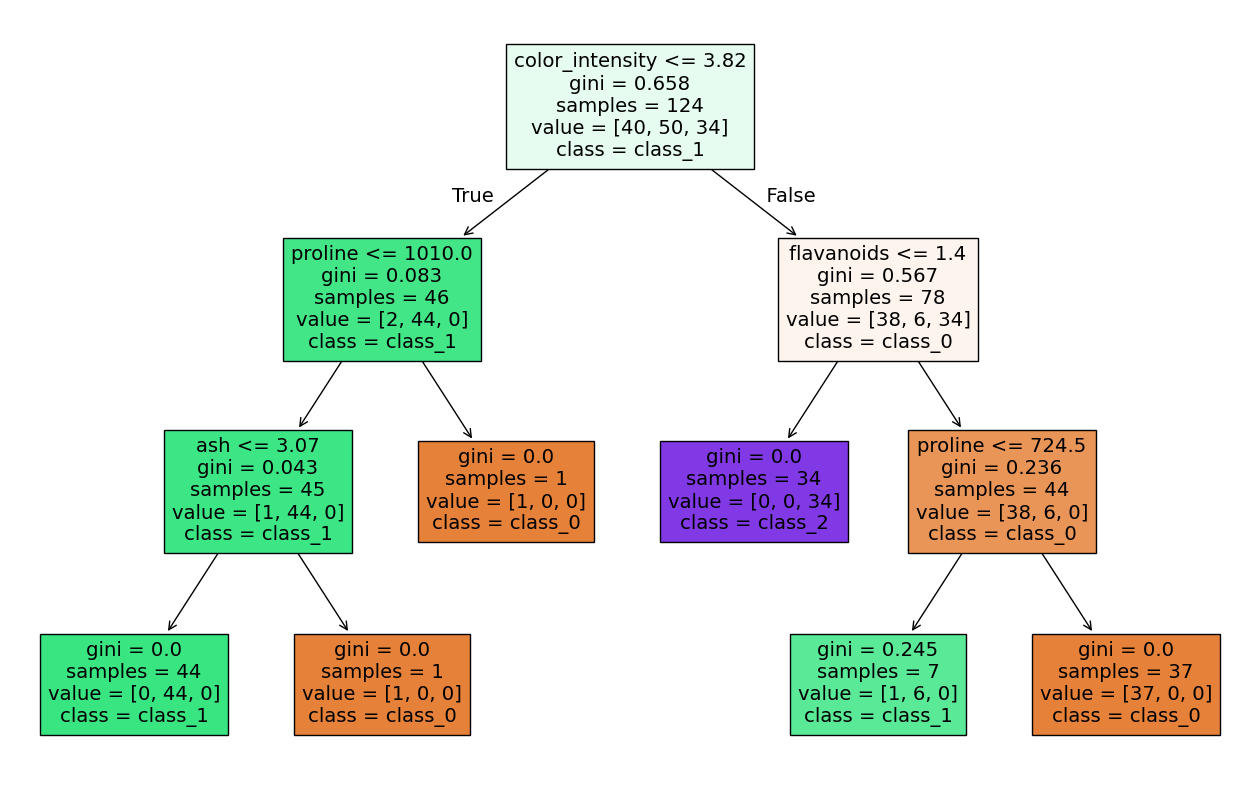

In [10]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

X = wine.data
y = wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=wine.target_names))
print(confusion_matrix(y_test, y_pred))

# Plot the tree
plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=wine.feature_names, class_names=wine.target_names, filled=True)
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



### Feature Importance
Let's interpret the model by looking at feature importance.

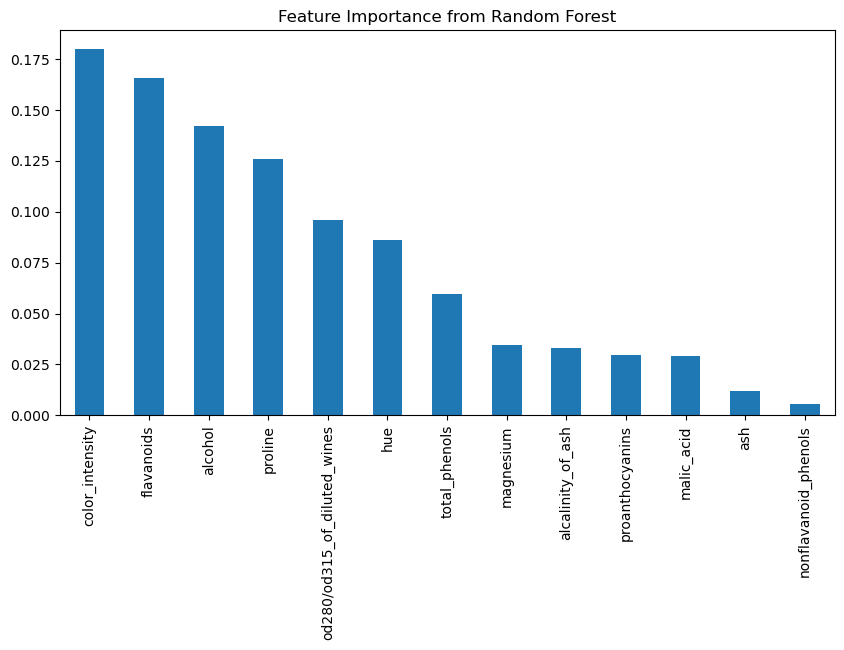

In [6]:
importances = pd.Series(clf.feature_importances_, index=wine.feature_names)
importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Feature Importance from Random Forest')
plt.show()

## Unsupervised Learning (Clustering)
We will use KMeans clustering and compare it with the true labels.

Adjusted Rand Score: 0.8974949815093207


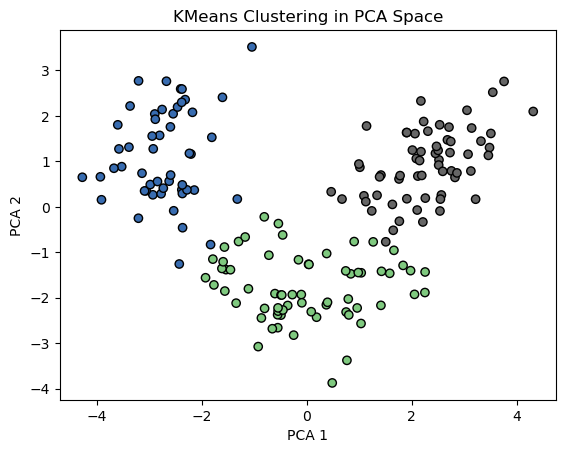

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
print('Adjusted Rand Score:', adjusted_rand_score(y, clusters))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='Accent', edgecolor='k')
plt.title('KMeans Clustering in PCA Space')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## Conclusion
- Random Forest classifier achieved the highest accuracy.
- Key features include flavanoids, alcohol, and color intensity.
- PCA and clustering confirmed that wine classes are distinguishable.
- Unsupervised learning provided a good approximation of wine classes.
